# 2. Analyse en Composante Principale (ACP)

## Objectif 


Identifier les principaux axes expliquant la variance dans l'adoption des énergies renouvelables à partir d'indicateurs économiques et sociaux .

## Questions posées


    1. Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?
	2. Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

## Données nécessaires :


    -Investissements dans les énergies renouvelables (% du PIB) : EG.ELC.RNWX.ZS.
    -PIB par habitant (en USD) : NY.GDP.PCAP.CD.
    -Taux de scolarisation dans le secondaire (% net) : SE.SEC.NENR

### Chargement des données et Selection des Données Nécéssaires

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier CSV
data = pd.read_csv("transition_energetique_pays_2023.csv")

# Sélection des colonnes spécifiques
data_acp = data[[
    "Investissements en énergies renouvelables (% du PIB)",
    "PIB par habitant (USD)",
    "Taux de scolarisation secondaire (%)"
]]

# Affichage des données sélectionnées
print(data_acp.head())

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  
0              415.707417                             47.154018  
1             1659.515290                             69.520690  
2             1568.724310                             69.520690  
3             8575.171134                             86.322940  
4             5364.027950                             69.520690  


# Préparation des données

On met les données sur une échelle comparable pour effectuer une analyse significative.

In [13]:
sc = StandardScaler()
# Centrage et réduction
Z = sc.fit_transform(data_acp)

# Matrice de nuage

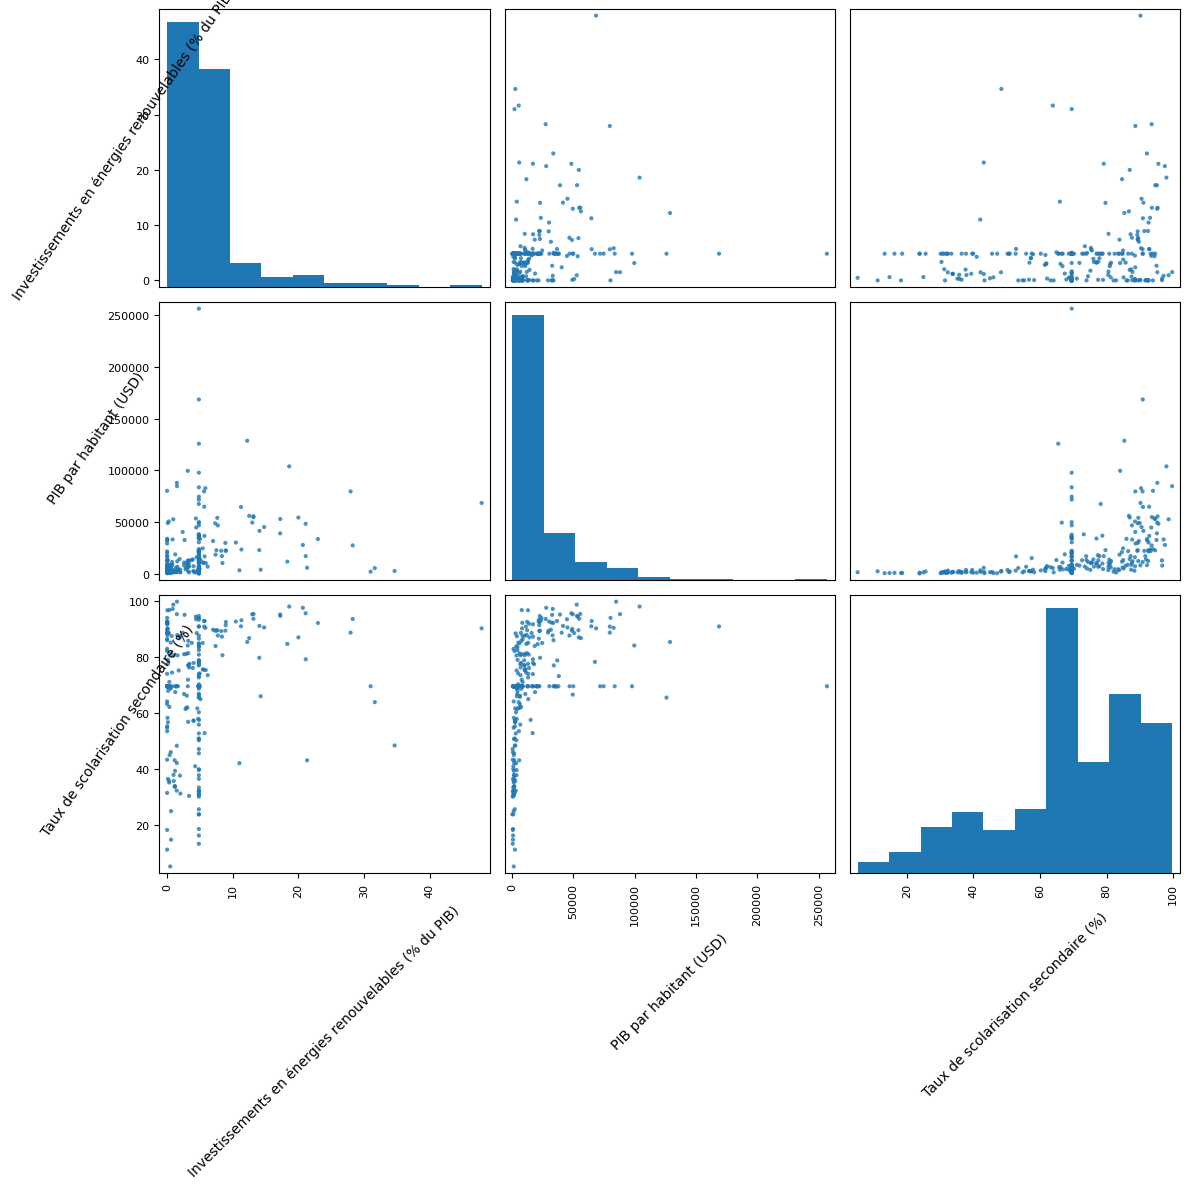

In [14]:
scatter_matrix = pd.plotting.scatter_matrix(
    data_acp,
    alpha=0.8,
    figsize=(12, 12),
    diagonal='hist'
)

# Personnaliser les axes pour rendre les labels plus lisibles
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=55)

plt.tight_layout()  # Pour éviter le chevauchement des éléments
plt.show()

#### Interprétation
### Observations générales :
1. **Distribution des variables (diagonale principale)** :
   - Chaque histogramme sur la diagonale montre la distribution d'une variable.
   - Par exemple :
     - Les **investissements en énergies renouvelables** sont concentrés vers des valeurs faibles (moins de 10 %).
     - Le **PIB par habitant** est fortement asymétrique, avec une majorité des pays ayant un PIB inférieur à 50 000 USD.
     - Le **taux de scolarisation secondaire** est réparti autour de 60 % à 100 %, indiquant une scolarisation élevée dans de nombreux pays.

2. **Relations entre les variables (hors diagonale)** :
   - **Investissements en énergies renouvelables vs. PIB par habitant** :
     - La densité de points est plus élevée pour les pays ayant un faible pourcentage d'investissements et un PIB faible ou modéré.
     - Aucun lien clair n'apparaît ici (pas de tendance linéaire visible).
   - **PIB par habitant vs. Taux de scolarisation secondaire** :
     - Une tendance semble indiquer qu'un PIB élevé est souvent associé à un taux de scolarisation secondaire élevé.
     - Cela reflète une possible corrélation positive entre développement économique et éducation.
   - **Investissements en énergies renouvelables vs. Taux de scolarisation secondaire** :
     - Il n'y a pas de tendance claire ; les points sont dispersés.

### Conclusions :
- Le PIB par habitant semble être positivement lié au taux de scolarisation secondaire.
- Les investissements en énergies renouvelables ne montrent pas de relation évidente avec les autres variables.
- Les distributions des données suggèrent une forte concentration autour de certaines valeurs (ex. PIB faible ou scolarisation élevée).

# ACP

In [15]:
#instanciation
acp = PCA()

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

3


# Variances

In [16]:
#variance expliquée
print(acp.explained_variance_)

[1.59085907 0.83600704 0.58445464]


#### Interprétation
- La première valeur propre (**1.59**) est nettement dominante, représentant environ **53%** (1.59/3) de la variance totale.
- La deuxième valeur propre (**0.83**) représente environ **28%** de la variance.
- La dernière valeur propre est de (**0.58**),la plus faible parmi les valeurs présentes (**19%**) .

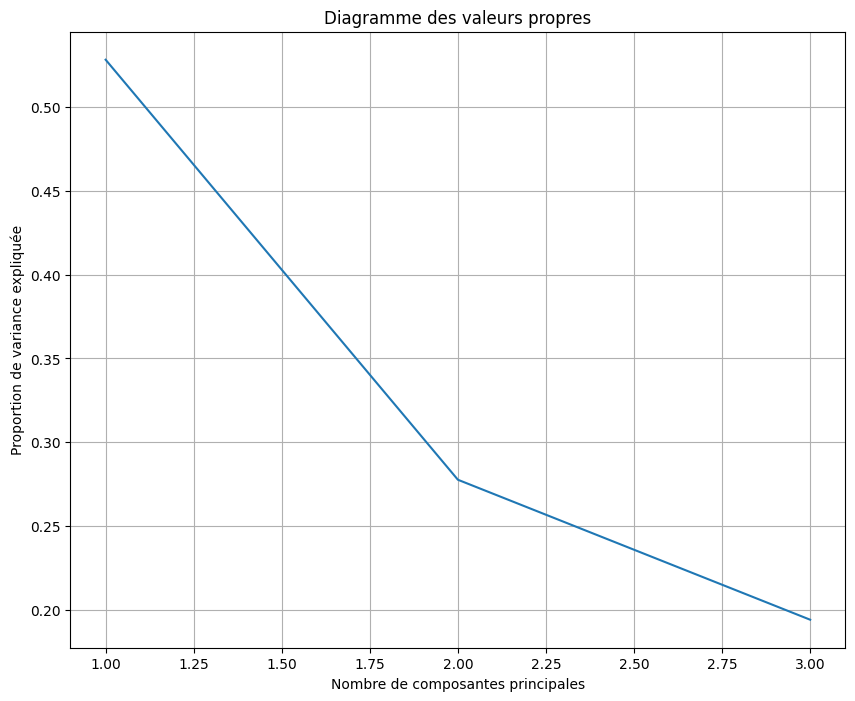

In [17]:
pca = PCA(n_components=len(data_acp.columns))
pca.fit(coord)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

#### Interprétation

#### Première composante (CP1) :

- Elle explique environ **53%** de la variance totale (proportion ≈ 0.53).
- C'est la composante la plus importante, ce qui indique qu'elle capture une grande partie des variations présentes dans les données

#### Deuxième composante (CP2) :

- Elle explique environ **28%** de la variance (proportion ≈ 0.28).
- La nette "rupture" visible après cette composante (effet du coude dans le graphique) montre qu'à partir de cette composante, l'information ajoutée est beaucoup moins significative.

#### Troisième composantes (CP3)  :

- Elles expliquent chacune moins de **19%** de la variance (proportion ≈ 0.19).
- Cette composante contribue relativement peu à la description des données et semble moins pertinente que les deux composantes précédentes pour une analyse principale.

---

#### Conclusions :

- Le "coude" très marqué après la deuxième composante montre clairement qu'il serait judicieux de conserver que **2 composantes principales**.
- Avec ces 2 composantes, on atteint une couverture de **81%** de la variance totale, ce qui est excellent pour une réduction dimensionnelle efficace.
- La réduction de dimension de **3 à 2 variables** permet de simplifier l'analyse tout en préservant l'essentiel des informations contenues dans les données.

# Individus

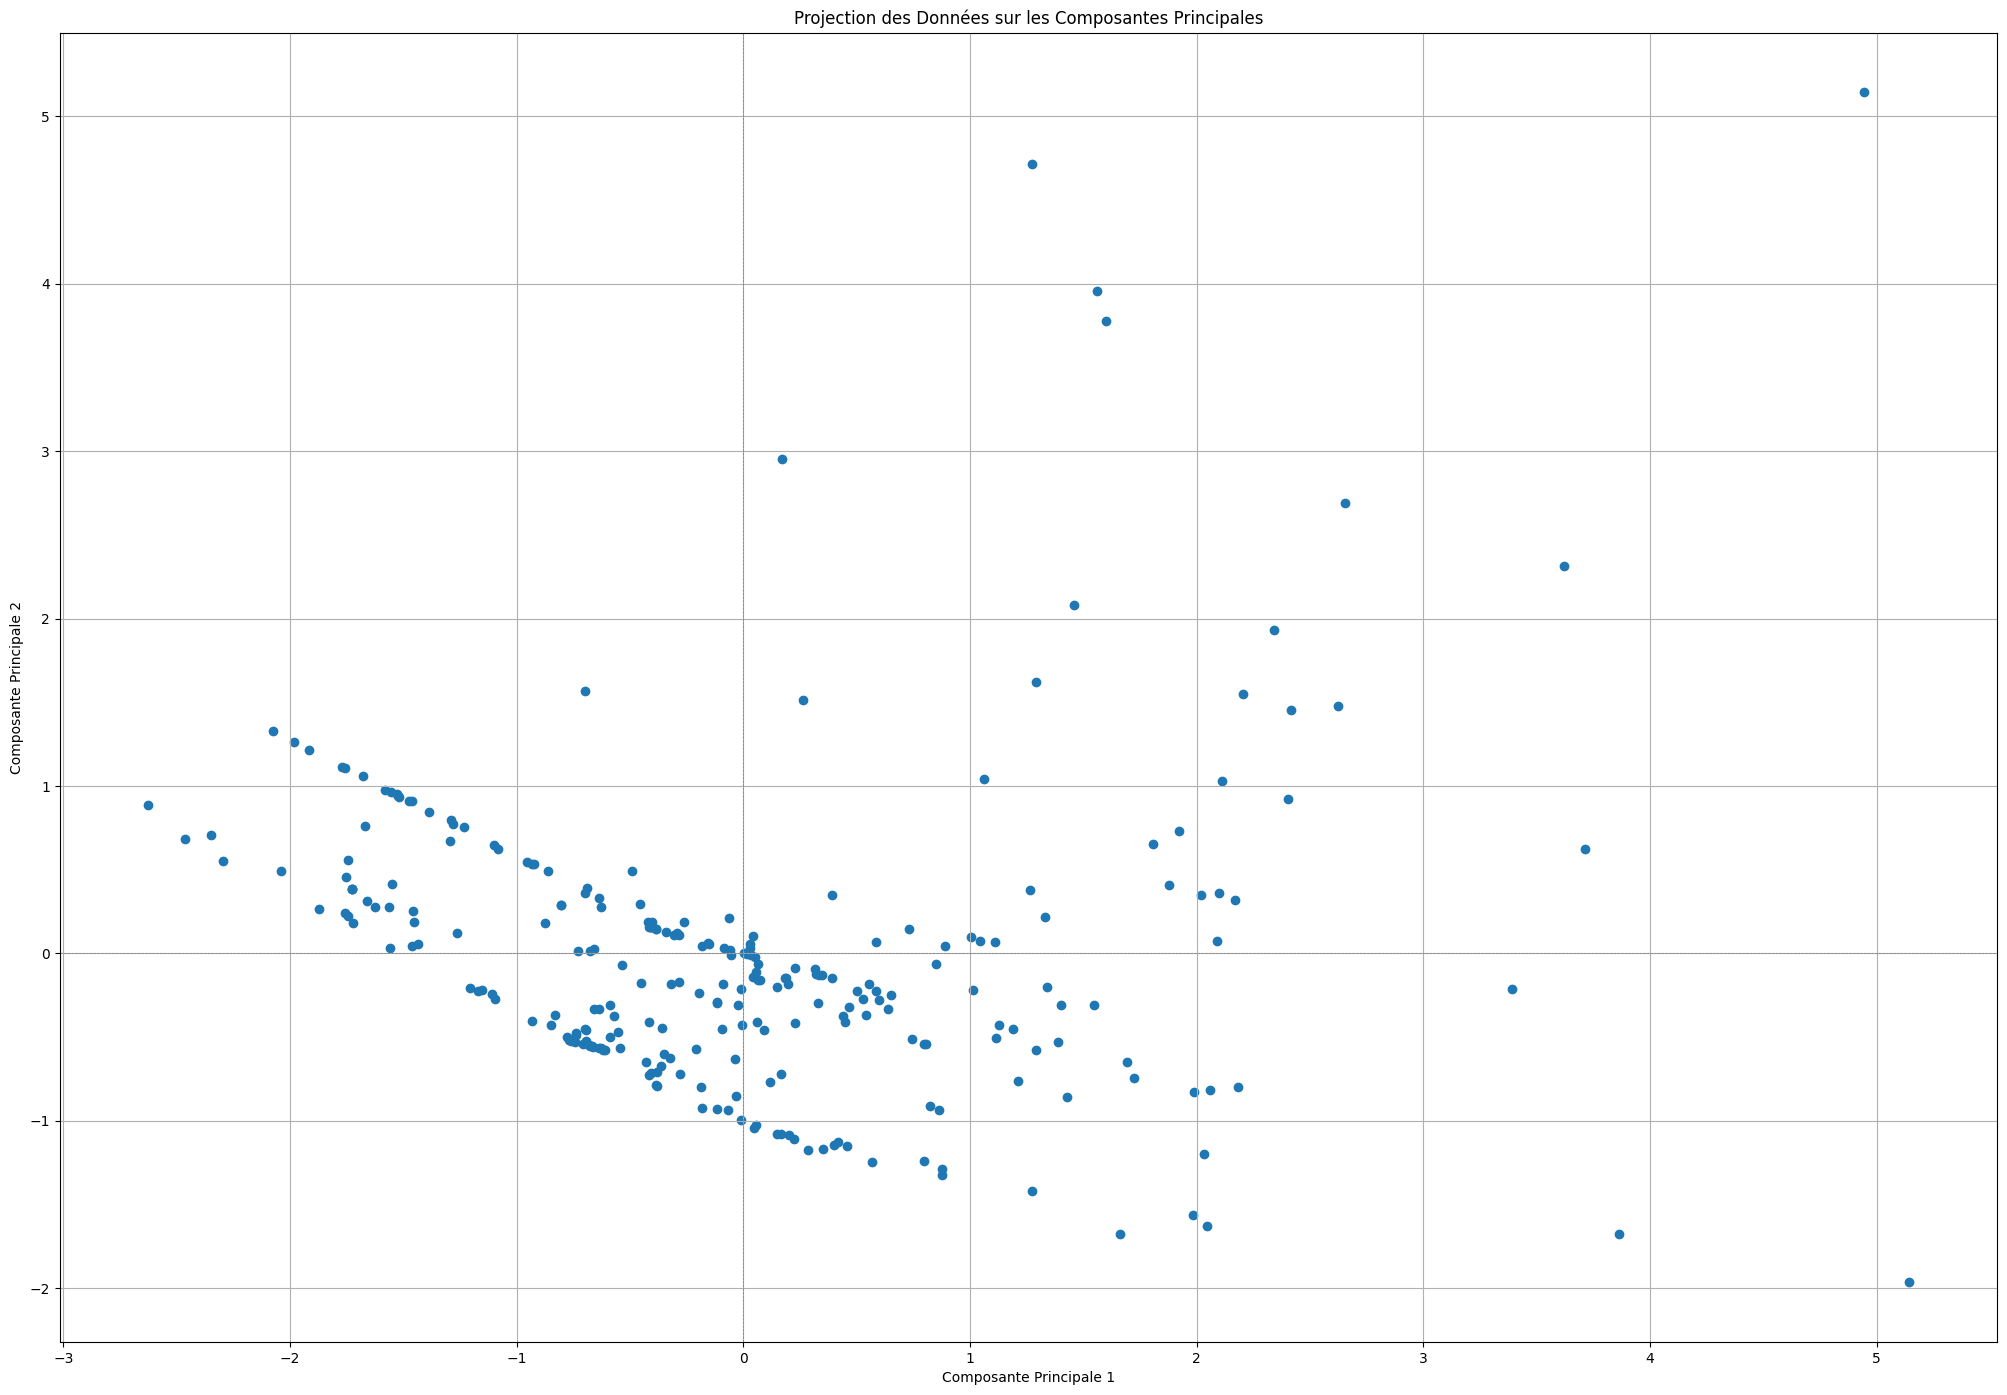

In [18]:
plt.figure(figsize=(25, 17))
plt.scatter(coord[:, 0], coord[:, 1])

# Boucle pour annoter les points avec les noms des pays
#for i in range(len(coord)):
 #   plt.annotate(data['Pays'].iloc[i], (coord[i, 0], coord[i, 1] + 0.1))

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


#### Interprétation :
L'axe horizontal (Composante Principale 1) et l'axe vertical (Composante Principale 2) représentent les deux principales dimensions qui expliquent la plus grande part de variance dans les données. Ensemble, elles capturent environ 81% de la variance totale.

Distribution des Points :

Chaque point représente un pays. La position du point dans cet espace bidimensionnel montre comment le pays se situe par rapport aux deux composantes principales.

Les points qui sont proches les uns des autres dans ce graphique sont des pays qui présentent des similarités en termes des variables étudiées (Investissements en énergies renouvelables, PIB par habitant, et taux de scolarisation secondaire).

Sur CP1, la plupart des points s'étalent de -3 à 3, ce qui est une grande dispersion.
Pour CP2, la plupart des points s'étalent de -2 à 2, ce qui est également une grande dispersion


# Variables

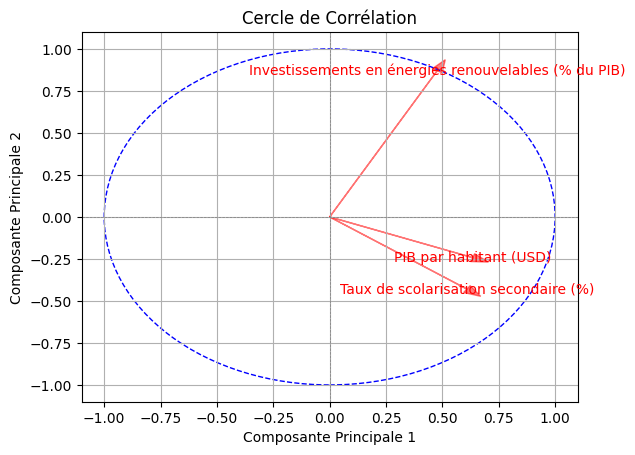

In [19]:
acp = PCA(n_components=2)
coord = acp.fit_transform(Z)
components = acp.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, data_acp.columns[i], color='r', ha='center', va='center')

# Tracer un cercle, alpha=0.5
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

#### Interprétation :
    -Investissements en énergies renouvelables et CP2: Il existe une corrélation forte et spécifique entre les investissements en énergies renouvelables et la deuxième composante principale. 
    
    -PIB par habitant et CP1: Le PIB par habitant est fortement corrélé à la première composante principale
    
    -Taux de scolarisation et CP1: Le taux de scolarisation est également corrélé à la première composante principale, mais moins fortement que le PIB.
    
    -Angle entre les vecteurs: L'angle quasi droit entre les vecteurs représentant les investissements en énergies renouvelables et les autres variables suggère que ces investissements sont relativement indépendants des autres facteurs considérés. Contrairement au PIB et le taux de scolarisatation secondaire qui indiquent une certaine corrélation vu le petit angle entre ces deux variables.
    
    -Les investissements sont le mieux  représentée dans ce plan (flèche plus longue).

    -La Composante Principale 1 (axe horizontal) est liée au PIB et le taux de scolarisation, bien que moins à cette dernière.
    -La Composante Principale 2 (axe vertical) est fortement influencée les investissements

# Réponse à la question 1: Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?

Les principaux facteurs identifiés sont :

    Investissements en énergies renouvelables (% du PIB) : Ils sont représentés par la Composante Principale 2 (CP2) et sont relativement indépendants des autres variables économiques et sociales.
    PIB par habitant : Fortement lié à la Composante Principale 1 (CP1). Un PIB plus élevé favorise des investissements en énergies renouvelables indirectement via des impacts sur les structures économiques.
    Taux de scolarisation dans le secondaire (%) : Corrélé au PIB (corrélation plus faible avec CP1).On pourrait déduire que ce facteur influence indirectement les investissements en énergies renouvelables via une meilleure éducation et sensibilisation

# Réponse à la question 2: Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

    Composante Principale 1 (CP1) : Liée principalement au PIB par habitant et au taux de scolarisation. Elle reflète un axe socio-économique général qui englobe les conditions favorables à l'adoption des énergies renouvelables (richesse et éducation).

    Composante Principale 2 (CP2) : Liée spécifiquement aux investissements en énergies renouvelables. Cette composante mesure directement l’engagement financier des pays dans la transition énergétique, indépendamment du PIB et de l'éducation.

En bref, CP1 reflète les conditions socio-économiques globales, tandis que CP2 reflète l'effort financier spécifique des pays pour la transition énergétique.